# Gradient Boosting Algorithm

## Setup of imports and clean dataframe

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
tf= pd.read_csv(r'../data/train.csv')
rf= pd.read_csv(r'../data/test.csv')

In [3]:
tf # the training set

,userId,age,gender,scentLover,ecoInterest,MrPropre,Antikal,Ariel,Dash,pods,...,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount,interested_by_fairypeps_email,level_of_interest_about_marketing,number_of_actions,washDishes
0,use_XbA1FTDcCrTMNTHK1851TzjyPMP,0.077922,1.0,0.000000,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.002068,1
1,use_3WHgsMVGSg5MHG2zja91TzdfmY2,0.636364,1.0,0.379664,0.666667,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.022234,1
2,use_2SisOiR8QwDaHI4svm11TzcvK7V,0.350649,1.0,0.000000,0.666667,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.009824,1
3,use_W0T1LmfKaQPJYD1RTWh1Tzdc69H,0.220779,1.0,0.333333,0.333333,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.002327,0
4,use_KwYWZ7UMl4veveOaPGK1TzddtmI,0.259740,1.0,0.379664,0.000000,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.936143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,use_ICSyEvCcRNPpQeBdWcM1TzdczV8,0.454545,1.0,0.379664,0.386816,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043175,1
11996,use_Q5DNYeSmG7g6VeMV4n71TzeTRRz,0.324675,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.2,0.000517,0
11997,use_rEoce5pc0MlKpndfzNj1Tze3J1L,0.311688,1.0,0.379664,0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.009824,0
11998,use_0AuDL2wOJHy9I16zSC21TzeHRMo,0.272727,0.0,0.379664,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.000259,1


In [4]:
rf # the testing set

,userId,age,gender,scentLover,ecoInterest,MrPropre,Antikal,Ariel,Dash,pods,...,nbChildren,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount,interested_by_fairypeps_email,level_of_interest_about_marketing,number_of_actions
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,0.259740,1.0,0.379664,0.666667,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.005946
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,0.350649,1.0,0.379664,0.666667,0.0,0.0,1.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.001551
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,0.116883,1.0,0.379664,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.005946
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,0.623377,1.0,0.379664,0.386816,1.0,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.00000,0.040848
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,0.311688,1.0,0.000000,0.333333,0.0,0.0,1.0,1.0,1.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.134436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,0.415584,1.0,1.000000,0.666667,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.953082,0.71773,0.019794
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,0.324675,1.0,0.333333,0.666667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,0.40000,0.008273
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,0.259740,1.0,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,...,0.4,0.0,1.0,0.0,0.0,0.0,0.0,-0.953082,0.71773,0.019794
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,0.259740,1.0,0.333333,0.386816,1.0,1.0,1.0,1.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.015770


In [5]:
#Deleting the Id (we don't want our training to take into account the Id)
tf=tf.drop(columns='userId')
sol=pd.DataFrame({'userId':rf['userId']}) #creating the dataframe for the solution and getting the ID
rf=rf.drop(columns='userId') #dropping the id to have the same structure as the training dataset

In [6]:
#Convert data into float to be used in our algorithm

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

tf=clean_dataset(tf)
rf=clean_dataset(rf)

## Splitting our data into test and train sets

In [7]:
#splitting our dataset into one set of training and one set of test
y = tf.washDishes.values
x = tf.drop(['washDishes'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

We define the predictors variables, then the target variable to predict

In [20]:
predictors = x.columns
predictors= np.array(predictors)
target =['washDishes']

## Implementation of GradientBoosting Algorithm

In [9]:
# Gradient Boosting parameters
gbm_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'verbose': 0
}

In [10]:
clf =  GradientBoostingClassifier(n_estimators=200, min_samples_leaf= 3, max_features=2, max_depth=2, random_state=0)

In [11]:
#Training of the model
clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=3,
                           n_estimators=200, random_state=0)

In [12]:
#Validation of the model on the remaining 20% of the training set
preds = clf.predict(x_test)


In [13]:
preds.shape

(2400,)

## Importance of features in our model

In [21]:
#In order to better understand the importance of each variable, we want to plot the features importance.
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

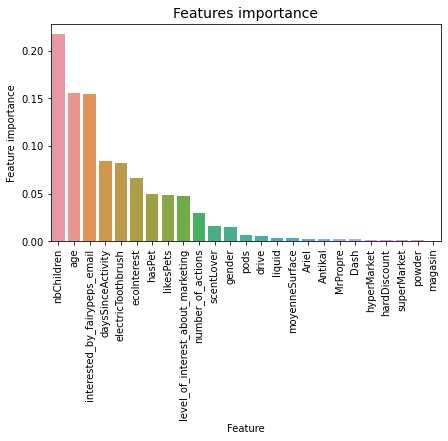

In [22]:
plot_feature_importance()

'nbChildren' and 'Age' are the two most important features in the prediction.

## Evaluation of our model

In [23]:
clf.score(x_train, y_train)
acc = round(clf.score(x_train, y_train) * 100, 2)
print("GradientBoosting accuracy (train set):", acc)

GradientBoosting accuracy (train set): 65.76


In [24]:

clf.score(x_test, y_test)
acc = round(clf.score(x_test, y_test) * 100, 2)
print("GradientBoosting accuracy (validation set):", acc)

GradientBoosting accuracy (validation set): 65.33


In [25]:
print(metrics.classification_report(y_test, preds, target_names=['Hand', 'Auto']))

              precision    recall  f1-score   support

        Hand       0.67      0.90      0.76      1503
        Auto       0.59      0.24      0.34       897

    accuracy                           0.65      2400
   macro avg       0.63      0.57      0.55      2400
weighted avg       0.64      0.65      0.61      2400



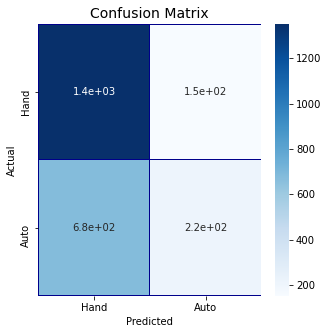

In [26]:
def plot_confusion_matrix():
    cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Hand', 'Auto'],
                yticklabels=['Hand', 'Auto'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

plot_confusion_matrix()

## Searching for the best parameters for our classifier

Let's initialize the GradientSearchCV parameters for optimization. We will set only few parameters, as following:

n_estimators: number of trees in the foreset;

max_features: max number of features considered for splitting a node;

max_depth: max number of levels in each decision tree;

min_samples_split: min number of data points placed in a node before the node is split;

min_samples_leaf: min number of data points allowed in a leaf node.

In [29]:
rf_clf = clf.fit(x_train, y_train) #Gradient Search

parameters = {
    'n_estimators': (300, 400, 500),
    'max_depth': (1.5, 2, 2.5),
    'min_samples_leaf': (2, 3, 4),
    'max_features': (3, 4, 6)
}

#We initialize GridSearchCV with the classifier, the set of parameters, number of folds and also the level of verbose for printing out progress.

gs_clf = GridSearchCV(rf_clf, parameters, n_jobs=-1, cv = 5, verbose=0)
gs_clf = gs_clf.fit(x_train, y_train)

print('Best scores:',gs_clf.best_score_)
print('Best params:',gs_clf.best_params_)

#Let's predict with the validation data.

preds = gs_clf.predict(x_test)



Best scores: 0.6509375
Best params: {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 300}


In [30]:
gs_clf.score(x_test, y_test)
acc = round(gs_clf.score(x_test, y_test) * 100, 2)
print("GradientBoosting accuracy optimized (validation set):", acc)

GradientBoosting accuracy optimized (validation set): 65.04


In [31]:
print(metrics.classification_report(y_test, preds, target_names=['Hand', 'Auto']))

              precision    recall  f1-score   support

        Hand       0.67      0.87      0.76      1503
        Auto       0.56      0.28      0.38       897

    accuracy                           0.65      2400
   macro avg       0.62      0.58      0.57      2400
weighted avg       0.63      0.65      0.62      2400



## Use of our model in the test dataset to submit on Kaggle

In [33]:
# Predicting, and exporting to csv to make a submission
prediction_test = gs_clf.predict(rf) #the prediction
sol['washDishes'] = prediction_test
sol["washDishes"] = sol["washDishes"].apply(lambda e: 'Auto' if e == 1 else 'Hand')#replacing the -1 and 1 with the original values
sol.to_csv('../data/submit_gradientboosting.csv', index=False)  #exporting to csv without the index
sol #checking the output

,userId,washDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,Hand
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,Hand
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,Hand
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,Auto
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,Hand
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,Hand
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,Hand
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,Hand
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,Hand
